# Data wrangling<a id='2_Data_wrangling'></a>

##  Introduction<a id='2.2_Introduction'></a>

## Imports <a id='2.3_Imports'></a>

In [1]:
pip install library

Note: you may need to restart the kernel to use updated packages.


In [2]:
#loading necessary python libraries and loading dataset as dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime
from library1.sb_utils import save_file


df = pd.read_csv('../data/breast_cancer_survival.csv')

## Data Definition<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [3]:
#the dataset has 334 entries 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [4]:
df.columns
#Protein columns are associated with the levels of four proteins closely related to breast cancer
#Tumour_Stage refers to the stage of the cancer (String values)
#Histology refers to the type of breast cancer
#ER status refers to estrogen receptor status (String values)
#PR Status refers to progesterone receptor status (String values)
#HER 2 Status refers to HER2 receptor status (String Values)
#Surgery_type refers to the procedure(string Values)
#Date_of Surgery is the date of the procedure (String Values)
#Date_of_last_visit is the patients last clinic visit date (Stringe Values)
#Patient_Status is whether the inividual is currently alive or dead (String Values)

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [5]:
#Number of unique values in each column
df.nunique()

Age                    57
Gender                  2
Protein1              333
Protein2              334
Protein3              334
Protein4              333
Tumour_Stage            3
Histology               3
ER status               1
PR status               1
HER2 status             2
Surgery_type            4
Date_of_Surgery       181
Date_of_Last_Visit    285
Patient_Status          2
dtype: int64

In [6]:
#Checking columns with descriptions of cancer type and surgery type for mistakes, typos
Histology_unique_values = df['Histology'].unique()
print(Histology_unique_values)
Surgery_unique_values = df['Surgery_type'].unique()
print(Surgery_unique_values)

['Infiltrating Ductal Carcinoma' 'Infiltrating Lobular Carcinoma'
 'Mucinous Carcinoma']
['Other' 'Lumpectomy' 'Modified Radical Mastectomy' 'Simple Mastectomy']


In [7]:
#Summary Statistics for each of columns that contain integer values 
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


## Data Cleaning<a id='2.5_Load_The_Ski_Resort_Data'></a>


In [8]:
#Converting date_of_surgery and date_of_last_visit to date-time value
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])

In [9]:
#Converting Tumour_Stage roman numeral strings into integers
df.loc[df['Tumour_Stage']=='I','Tumour_Stage'] = 1
df.loc[df['Tumour_Stage']=='II','Tumour_Stage'] = 2
df.loc[df['Tumour_Stage']=='III','Tumour_Stage'] = 3
df.loc[df['Tumour_Stage']=='IV','Tumour_Stage'] = 4

In [10]:
#Converting Tumour_Stage values into a categorical variable 
df['Tumour_Stage'] = df['Tumour_Stage'].astype('category')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 334 non-null    int64         
 1   Gender              334 non-null    object        
 2   Protein1            334 non-null    float64       
 3   Protein2            334 non-null    float64       
 4   Protein3            334 non-null    float64       
 5   Protein4            334 non-null    float64       
 6   Tumour_Stage        334 non-null    category      
 7   Histology           334 non-null    object        
 8   ER status           334 non-null    object        
 9   PR status           334 non-null    object        
 10  HER2 status         334 non-null    object        
 11  Surgery_type        334 non-null    object        
 12  Date_of_Surgery     334 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null    datetime64[ns]

In [11]:
#Calculating percentage of missing values in each column
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count')
#Patient Status and date_of_last_visit have missing values
#date_of_last_visit missing values can be attributed to patient passing away

,count,%
Age,0,0.000000
Gender,0,0.000000
Protein1,0,0.000000
Protein2,0,0.000000
Protein3,0,0.000000
Protein4,0,0.000000
Tumour_Stage,0,0.000000
Histology,0,0.000000
ER status,0,0.000000
PR status,0,0.000000


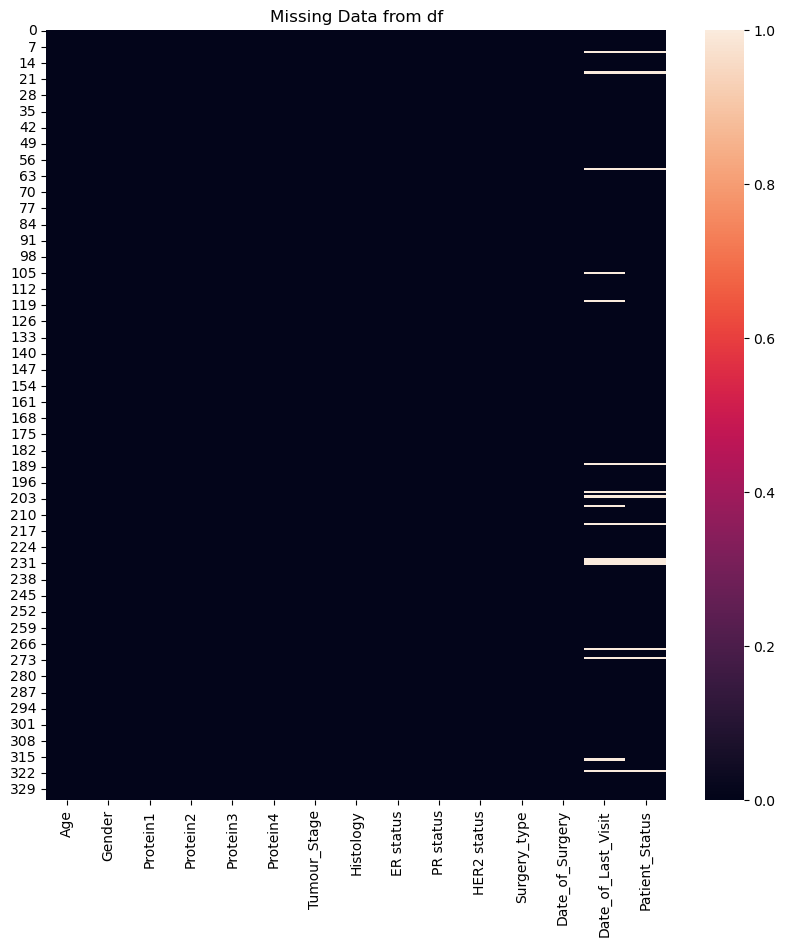

In [12]:
#plotting missing data using subplot and heatmap
plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=True)
plt.title('Missing Data from df')
plt.show()

In [13]:
#Dropping rows with missing data in both Patient_Status and Last Visit
df1 = df.dropna(subset=['Patient_Status','Date_of_Last_Visit'],how = 'all')

In [14]:
df1.info()
#the dropping process removed 14 rows from the dataframe 
#there are 4 instances of null values in Date_of_Last_Visit 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 321 non-null    int64         
 1   Gender              321 non-null    object        
 2   Protein1            321 non-null    float64       
 3   Protein2            321 non-null    float64       
 4   Protein3            321 non-null    float64       
 5   Protein4            321 non-null    float64       
 6   Tumour_Stage        321 non-null    category      
 7   Histology           321 non-null    object        
 8   ER status           321 non-null    object        
 9   PR status           321 non-null    object        
 10  HER2 status         321 non-null    object        
 11  Surgery_type        321 non-null    object        
 12  Date_of_Surgery     321 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null    datetime64[ns]

In [15]:
#Replacing null values in date of last visit with surgery date for the conditions in which patient status is dead
condition = df1['Patient_Status'] == 'Dead'
df1.loc[condition & df1['Date_of_Last_Visit'].isnull(), 'Date_of_Last_Visit'] = df1.loc[condition, 'Date_of_Surgery']

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 321 non-null    int64         
 1   Gender              321 non-null    object        
 2   Protein1            321 non-null    float64       
 3   Protein2            321 non-null    float64       
 4   Protein3            321 non-null    float64       
 5   Protein4            321 non-null    float64       
 6   Tumour_Stage        321 non-null    category      
 7   Histology           321 non-null    object        
 8   ER status           321 non-null    object        
 9   PR status           321 non-null    object        
 10  HER2 status         321 non-null    object        
 11  Surgery_type        321 non-null    object        
 12  Date_of_Surgery     321 non-null    datetime64[ns]
 13  Date_of_Last_Visit  321 non-null    datetime64[ns]

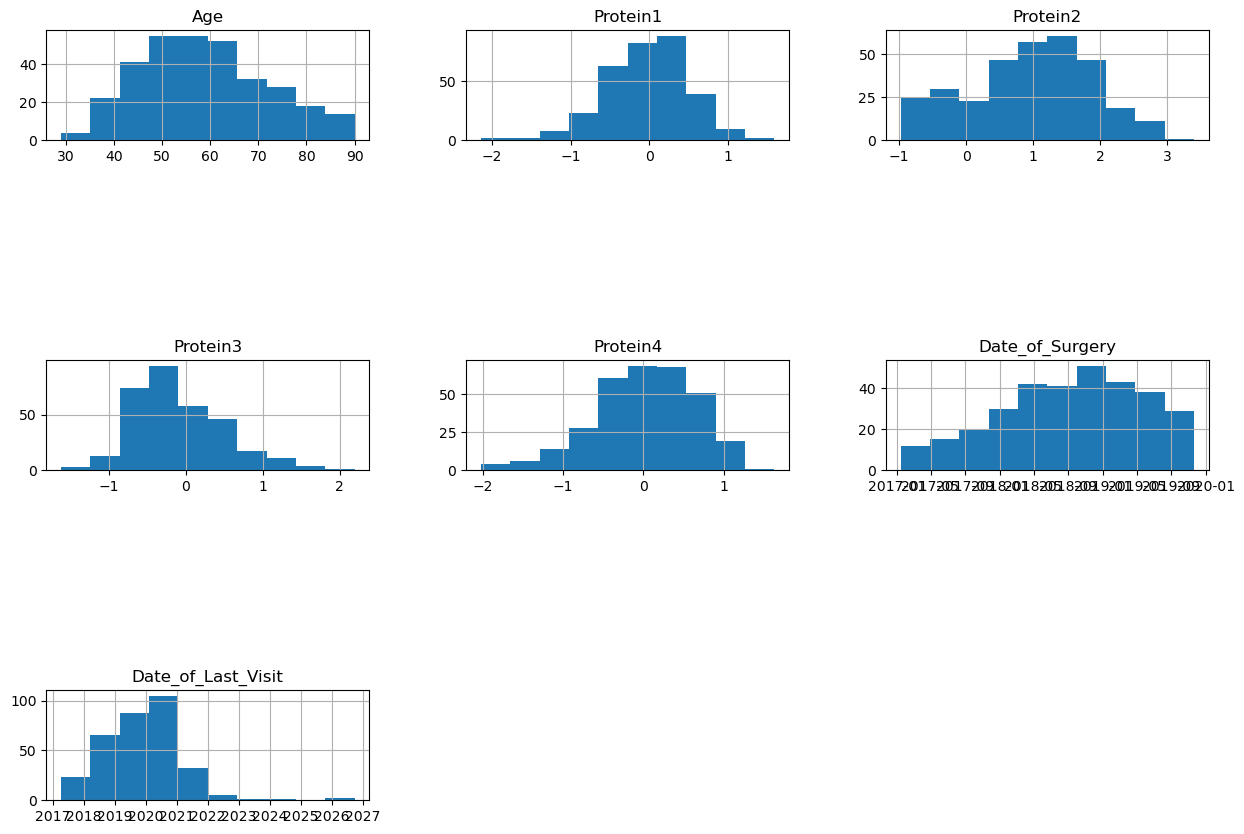

In [17]:
#Examining distributions of data and attempting to find outliers or uneven skewing
df1.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=2.0);

In [18]:
#Finding the maximum years on the 2 date columns
max_last_visit_year = df1['Date_of_Last_Visit'].dt.year.max()
max_year_surgery = df1['Date_of_Surgery'].dt.year.max()
print(max_last_visit_year,max_year_surgery)
#There is a misentries on the date of last visit column showing a visit from 2026

2026 2019


In [19]:
#Finding entries with date of last visit past current date 
above_2022_count = df1.loc[df1['Date_of_Last_Visit'].dt.year > 2022]
above_2022_count

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
90,50,FEMALE,-0.25023,0.32300,-0.51376,-0.810810,1,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2019-03-02,2026-09-24,Alive
128,72,FEMALE,-0.42298,0.38330,0.41699,-0.088218,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,2018-01-26,2026-05-03,Dead
130,52,FEMALE,0.44520,0.81938,-0.43867,-0.007896,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2019-05-11,2023-11-14,Alive
265,59,FEMALE,0.32248,2.05020,-0.34684,-1.148500,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-01-30,2024-06-04,Dead


In [20]:
#Replacing date of last visit (past 2022) with date of surgery
max_year_condition = df['Date_of_Last_Visit'].dt.year > 2022
df1.loc[max_year_condition, 'Date_of_Last_Visit'] = df1.loc[max_year_condition, 'Date_of_Surgery']

In [21]:
above_2023_count = df1.loc[df1['Date_of_Last_Visit'].dt.year > 2022]
above_2023_count

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status


In [22]:
df_cleaned = df1

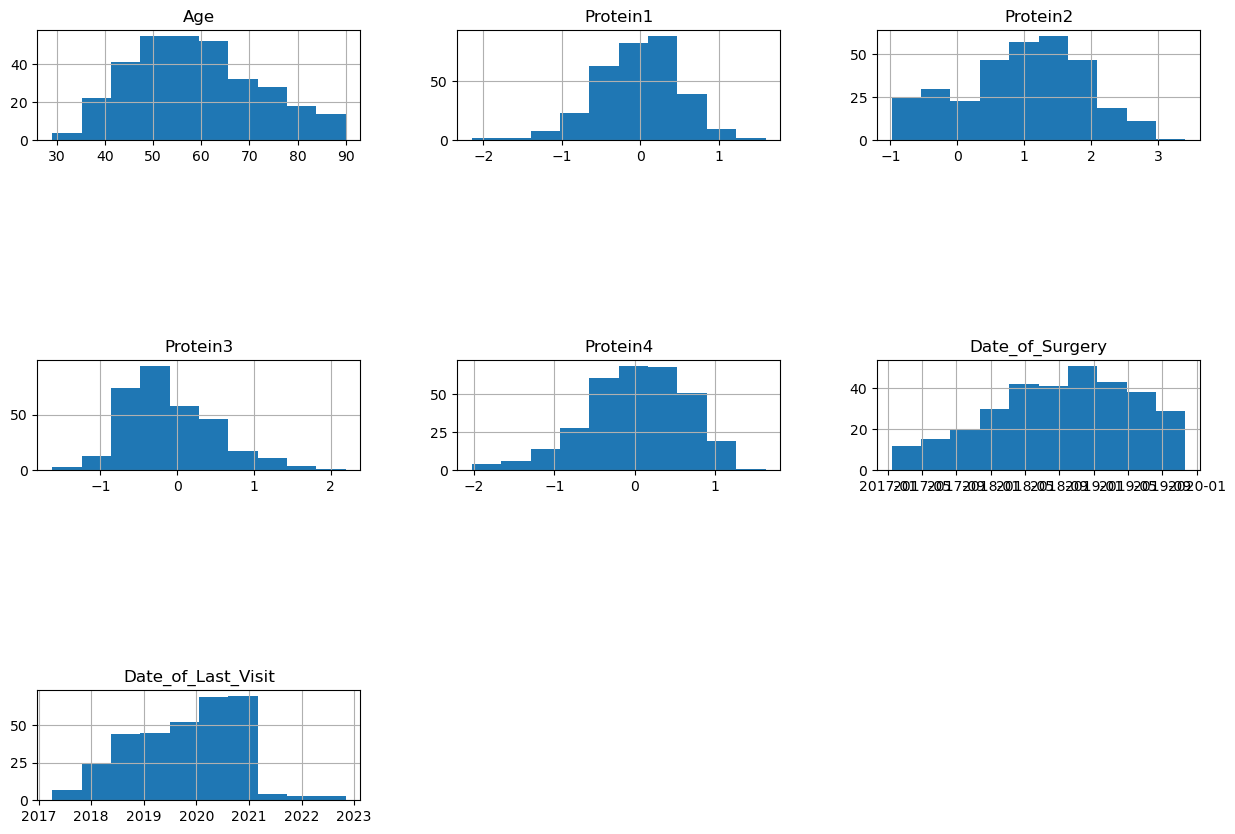

In [23]:
#Checking distributions again to see if outliers were removed 
df_cleaned.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=2.0);

## Final inspection<a id='2.5_Load_The_Ski_Resort_Data'></a>


In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 321 non-null    int64         
 1   Gender              321 non-null    object        
 2   Protein1            321 non-null    float64       
 3   Protein2            321 non-null    float64       
 4   Protein3            321 non-null    float64       
 5   Protein4            321 non-null    float64       
 6   Tumour_Stage        321 non-null    category      
 7   Histology           321 non-null    object        
 8   ER status           321 non-null    object        
 9   PR status           321 non-null    object        
 10  HER2 status         321 non-null    object        
 11  Surgery_type        321 non-null    object        
 12  Date_of_Surgery     321 non-null    datetime64[ns]
 13  Date_of_Last_Visit  321 non-null    datetime64[ns]

In [25]:
df_cleaned.shape

(321, 15)

In [26]:
#saving file
datapath = '../data'
save_file(df_cleaned,'breast_cancer_cleaned.csv',datapath)

Writing file.  "../data/breast_cancer_cleaned.csv"
